In [1]:
from datascience import *
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fitted_values(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def scatter_fit(table, x, y):
    plots.scatter(table.column(x), table.column(y), s=20)
    plots.plot(table.column(x), fitted_values(table, x, y), lw=2, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

In [3]:
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    eps = np.random.normal(0, 6, sample_size)
    y = (true_slope*x + true_int) + eps
    tyche = Table().with_columns(
        'x', x,
        'y', y
    )

    plots.figure(figsize=(6, 16))
    plots.subplot(4, 1, 1)
    plots.scatter(tyche['x'], tyche['y'], s=20)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    plots.subplot(4, 1, 2)
    plots.scatter(tyche['x'],tyche['y'], s=20)
    plots.title('What We Get to See')

    plots.subplot(4, 1, 3)
    scatter_fit(tyche, 'x', 'y')
    plots.xlabel("")
    plots.ylabel("")
    plots.title('Regression Line: Estimate of True Line')

    plots.subplot(4, 1, 4)
    scatter_fit(tyche, 'x', 'y')
    plots.ylabel("")
    xlims = np.array([np.min(tyche['x']), np.max(tyche['x'])])
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

In [4]:
def create_population(prior_disease_prob, n):
    disease = round(n * prior_disease_prob)
    no_disease = round(n * (1 - prior_disease_prob))

    status = np.array(['Disease'] * disease  +  ['No disease'] * no_disease)
    result = np.array(['Test +'] * (disease) + ['Test +'] * (round(no_disease * 0.05))  + \
                 ['Test -'] * (round(no_disease * 0.95)))
                 
    t = Table().with_columns(
    'Status', status,
    'Test Result', result
    )
    return t.pivot('Test Result', 'Status')

## Decisions ##

In [5]:
create_population(1/1000, 10000)

Status,Test +,Test -
Disease,10,0
No disease,500,9490


In [6]:
10 / 510

0.0196078431372549

In [7]:
# P(disease | tested +)
# if prior probability of disease is 1/10

(0.1 * 1) / (0.1*1 + 0.9*0.05)

0.689655172413793

In [8]:
create_population(1/10, 10000)

Status,Test +,Test -
Disease,1000,0
No disease,450,8550


In [9]:
# P(disease | tested +)
# if prior probability of disease is 0.5

(0.5 * 1) / (0.5*1 + 0.5*0.05)

0.9523809523809523

In [ ]:
create_population(0.5, 10000)

## Regression Recap ##

### The Model and Our Estimate ###

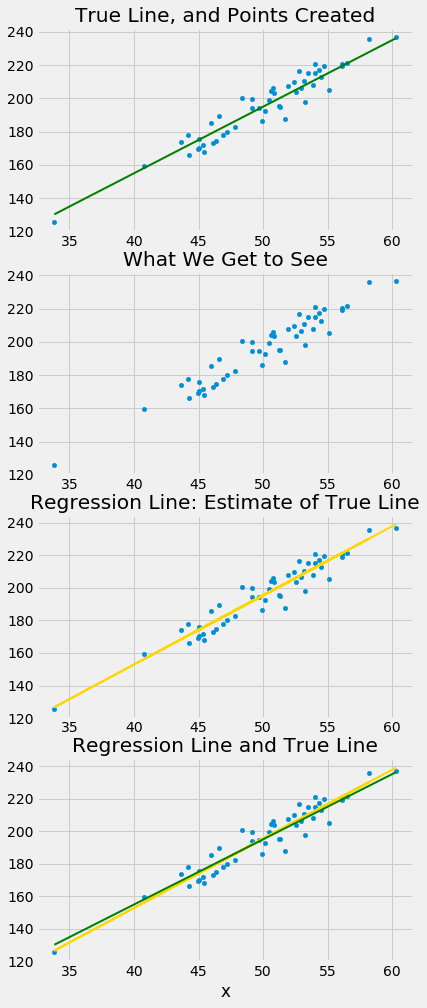

In [10]:
# The true line,
# the points created,
# and our estimate of the true line.
# Arguments: true slope, true intercept, number of points

draw_and_compare(4, -5, 50)